In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    ExtraTreesRegressor, GradientBoostingRegressor, RandomForestClassifier
)

from sklearn.neural_network import MLPClassifier

import joblib

import torch
from torch import nn

In [6]:
save_model = False

In [7]:
%run '0_tools.ipynb'

In [8]:
word_dict = list(np.load(f'{train_vect_path}updated_word_dict.npy'))

### Which Classifier to Load

In [45]:
# classifier = joblib.load(f'{saved_model_path}random_forest_3_classifier.joblib')

In [57]:
classifier = joblib.load(f'{saved_model_path}rf_political_classifier.joblib')

In [30]:
f = open(f'{desktop_path}CS_STUFF/Python/NLP/Sentiment_Analysis/Data/political_articles/cnn.txt', encoding="utf8")
articles = f.read().split('     \n')
f.close()
print(len(articles))

829


In [29]:
f = open(f'{desktop_path}CS_STUFF/Python/NLP/Sentiment_Analysis/Data/political_articles/WashExam.txt', encoding="utf8")
WashExamArticles = f.read().split('     \n')
f.close()
print(len(WashExamArticles))

5146


In [52]:
print_for_training = False
print_all_mannies = False

In [47]:
manualSentiments = [-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,0,-1,1,-1,0,0,-1,-1,-1,0,-1,-1,0,0,-1,-1,1,-1,-1,0,0,-1,
                   1,-1,0,0,1,0,-1,1,-1,-1,-1,0,-1,-1,1,0,-1,0,-1,-1,-1,0,-1,-1,-1,-1,-1,1,1,0,0,1,0,1,1,0,-1,0,-1,1,
                   1,1,-1,-1,0,-1,0,-1,-1,0,0,-1,0,-1,1,0,-1,1,0,-1,1,-1,0,1,1,-1,1]

manual_len = len(manualSentiments)
print(manual_len)

104


In [10]:
if(print_all_mannies): 
    index = 0
    endIndex = manual_len
else: 
    index = manual_len
    endIndex = index+50

In [43]:
if (print_for_training):
    
    df = pd.DataFrame([], [], ['Article'])

    article_num = index+1

    for article in articles[index:endIndex]:
        print(f'{article_num})')
        print(article)
    #     s = sentiment(article, classifier)
        df.loc[len(df)] = np.array(article)
        print(str_line)
        article_num+=1

In [53]:
print_for_training = True
print_all_mannies = False

In [54]:
manualSentiments2 = [-1,1,0,-1,-1,-1,-1,0,-1,-1,-1,0,-1,-1,0,1,-1,1]

manual_len2 = len(manualSentiments2)
print(manual_len2)

18


In [55]:
if(print_all_mannies): 
    index = 0
    endIndex = manual_len2
else: 
    index = manual_len2
    endIndex = index+50

In [56]:
if (print_for_training):
    
    df = pd.DataFrame([], [], ['Article'])

    article_num = index+1

    for article in WashExamArticles[index:endIndex]:
        print(f'{article_num})')
        print(article)
    #     s = sentiment(article, classifier)
        df.loc[len(df)] = np.array(article)
        print(str_line)
        article_num+=1

19)
Gov. Ron DeSantis (R-FL) defended the evacuation in one county hit on Wednesday by Hurricane Ian, stating that local officials in Lee County, Florida, where the storm made landfall, acted appropriately when they issued the orders on Tuesday. 
“There is a difference between a storm that’s going to hit north Florida that will have peripheral effects on your region, versus one that’s making a direct impact,” DeSantis said at a news conference on Friday in Lee County, according to the New York Times. “And so what I saw in southwest Florida is, as the data changed, they sprung into action.”
Some Florida counties, such as Charlotte, gave the orders on Monday, and DeSantis said that people in the Tampa Bay area were put on alert on Monday night. But tracking a hurricane is tricky, and as landfall approached, the expected path of the storm went south. Ian made landfall as a powerful Category 4 hurricane on Wednesday near Fort Myers, sparing Tampa from the worst of the storm.
 r
___________

In [12]:
df['True Sentiment'] = None

In [13]:
df['True Sentiment'][:manual_len] = manualSentiments

Text(0.5, 1.0, 'Distribution of Manual Sentiments (all articles)')

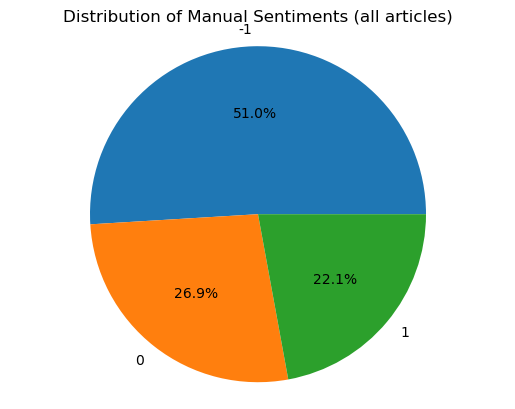

In [14]:
proportions = df['True Sentiment'].value_counts(normalize=True)
# print(proportions)
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Manual Sentiments (all articles)')

In [15]:
df['Vectors'] = df['Article'].apply(lambda x: vectorize(x, word_dict))

In [16]:
pos_df = df[df['True Sentiment']==1]
neutral_df = df[df['True Sentiment']==0]
neg_df = df[df['True Sentiment']==-1]

In [17]:
max_len = min(len(pos_df), len(neutral_df))

In [18]:
print(max_len)

23


In [19]:
pos_df = pos_df.head(max_len)
neutral_df = neutral_df.head(max_len)
neg_df = neg_df.head(max_len)

In [20]:
train_df = pd.concat([pos_df, neutral_df, neg_df], axis=0)

In [21]:
print(f'Train Size is {train_df.shape[0]} articles')

Train Size is 69 articles


Text(0.5, 1.0, 'Distribution of Manual Sentiments (train set)')

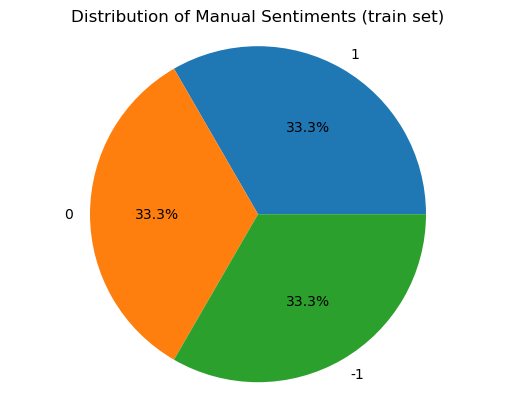

In [22]:
proportions = train_df['True Sentiment'].value_counts(normalize=True)
# print(proportions)
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Manual Sentiments (train set)')

In [23]:
X = train_df['Vectors'].tolist()
Y = train_df['True Sentiment'].tolist()

In [24]:
np_X = np.array(X)
np_Y = np.array(Y)

In [25]:
classifier.n_estimators

100

In [26]:
classifier.n_estimators = int(classifier.n_estimators * 1.25)
classifier.fit(np_X, np_Y)

RandomForestClassifier(n_estimators=125, random_state=12345)

In [27]:
classifier.score(np_X, np_Y)

1.0

In [28]:
manual_len

104

In [29]:
republicans = np.load(f'{desktop_path}CS_STUFF/Python/NLP/Political_Sentiment_Analysis/republicans.npy')
democrats = np.load(f'{desktop_path}CS_STUFF/Python/NLP/Political_Sentiment_Analysis/democrats.npy')

In [30]:
additionalGOP = ['donald', 'trump', 'ron']
additionalDems = ['joe', 'biden', 'democratic', 'crist', 'charlie', 'barack', 'obama', 'kamala', 'harris']

In [31]:
republicans = np.concatenate((republicans, np.array(additionalGOP)))
democrats = np.concatenate((democrats, np.array(additionalDems)))

In [32]:
both_parties = np.concatenate((republicans, democrats))

In [33]:
additional_skip_words = ['president', 'governor', 'senator', 'gov', 'gov.', 'sen', 'sen.', 'rep.', 'rep', 'michael',
                        'mike']

skip_words = np.concatenate((both_parties, np.array(additional_skip_words)))

In [59]:
GOP_preds = []
dem_preds = []

for article in articles[manual_len:]:
    new_article = article.split()
    try: party = new_article[len(new_article)-1]
    except: continue
        
    print()
    if (party == 'd'): print('Democrat Article')
    elif (party == 'r'): print('Republican Article')
    else: p = 'Error reading party'
        
    print()
    
    # preprocess article for sentiment analysis
    for i in range(len(new_article)-1):
        try:
            word = new_article[i]
            word = trimWord(word).lower()
            if (word in skip_words): 
                new_article.pop(i)
        except:
            continue
            
    new_article = ' '.join(new_article)
    
    # don't print party character at the end
    print(new_article[:len(new_article)-2])
    
    sent = sentiment(new_article, classifier, word_dict)
    predicted = sentiment_to_num(sent[0])
    
    if (party == 'd'): dem_preds.append(predicted)
    elif (party == 'r'): GOP_preds.append(predicted)

    print()
    print(f'Predicted Sentiment: {sent[0]}.')
    print(str_line)


Democrat Article

The White House has engaged in talks with Elon Musk about the possibility of setting up SpaceX’s satellite internet service Starlink inside Iran, multiple officials familiar with the discussions told CNN. The conversations, which have not been previously reported, come as the Biden administration searches for ways to support the Iranian protest movement that exploded just over a month ago after 22-year-old Mahsa Amini died under suspicious circumstances after being detained by the country’s morality police. The White House sees Starlink’s compact, easy-to-use technology as a potential solution to the Iranian regime’s aggressive efforts to restrict activists’ internet access and communications.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden said Friday that while he has not made a formal decision about running for reelection in 


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

After largely avoiding the abortion controversy surrounding Republican opponent Herschel Walker, Georgia Democratic Sen. Raphael Warnock is going right at the issue in a new TV ad. “For you, Herschel Walker wants to ban abortion,” the ad’s narrator says before clips are played of comments Walker made in support of a national abortion ban. The ad then plays news clips of allegations that Walker paid for a woman’s abortion, with one noting that “even his own son says that he is lying.” The ad ends with Walker inspecting a check during an NBC News interview and confirming it is his signature on it, though he denied it was reimbursement for an abortion. Walker has repeatedly denied he paid for a woman’s abortion, and CNN has not independently confirmed the allegations.

Predicted Sentiment: neutral.
________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

New Hampshire GOP Gov. Chris Sununu sat for an interview with CNN’s Jake Tapper on Wednesday night. The topic of election denialism – specifically related to New Hampshire Republican Senate nominee Don Bolduc – came up. Here’s the exchange: Tapper: Gov. Sununu, you’re a sane Republican at a time when a lot of people are looking for sane Republicans. Are you hurting the cause of sane Republicans when you embrace people like that? Sununu: No, look, this is about having folks in Washington, DC, that put New Hampshire first. Was the election stolen? Of course it wasn’t stolen. That’s nonsense, absolute nonsense, and it’s great to see him actually backtrack on that. But that isn’t the issue folks are going to vote on. Mar-a-Lago is not the issue folks are going to vote on. The people vote in their own self-interest, as the


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

A Wisconsin taxpayers group has asked the Supreme Court to step in on an emergency basis and temporarily block the Biden administration’s student loan forgiveness program from taking effect. The application for student loan forgiveness officially opened Monday. Student loan cancellation – worth up to $20,000 per eligible borrower – could begin as soon as Sunday, October 23, if the court does not intervene, according to the filing from the Brown County Taxpayers Association. The request was filed to Justice Amy Coney Barrett, who has jurisdiction over the lower court that ruled on the case. She is likely to refer the matter to the full court.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden on Tuesday made a major promise on a push to put abortion rights into law as his party looks to seize on the politically divisive issue in the final push ahead of the midterm elections. At an abortion-rights-focused speech at a Democratic National Committee event on Tuesday, Biden said that if Democrats elect more senators and keep control of the House in the midterms then he’d make abortion a top issue. “The court got Roe right nearly 50 years ago and I believe the Congress should codify Roe, once and for all,” Biden said.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

In December 2019, longtime Washington Post journalist Bob Woodward asked then-President Donald Trump to explain 


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

After being outspent by Democrats all summer, supporters of Republican candidates in the 10 most competitive Senate races have dumped more than $365 million on TV and digital ads since the beginning of September to catch up. That financial gap is being filled by the Senate Leadership Fund, a super PAC affiliated with Republican Senate Minority Leader Mitch McConnell, according to data from AdImpact, an advertising tracking firm. With more than $196 million invested on the airwaves and online so far, the Senate Leadership Fund is by far the largest TV and digital advertiser this fall in six of the 10 states deemed most likely to flip by CNN — Georgia, Nevada, New Hampshire, North Carolina, Ohio and Wisconsin. It’s hard to overstate the effect the super PAC has single-handedly made on advertising in the final two months o


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

A selfie crowd formed around Pete Buttigieg as he stood in line for coffee at the airport in Washington. One woman said she wasn’t going to stop because she wasn’t sure it was him. “It’s me,” the Transportation secretary replied. An older man explained to his wife, “That’s Pete BOOT-GUG,” missing the pronunciation and the emphasis.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Seven Democrats in the 10 most competitive Senate races started this month and the home stretch to Election Day with bigger cash stockpiles than their Republican rivals, newly filed campaign finance reports show. But even with that financial edge, Democrats face a withering advertising assault in the final weeks of the campa


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Just try keeping track of the dizzying web of legal issues confronting or somehow involving former President Donald Trump and his allies, all of which he lumps into the category of “witch hunt.” Here are some of the major developments this week: There’s another case on the horizon:

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The Biden administration authorized an additional $725 million dollars in security aid for Ukraine Friday, as the country recovers from Russia’s recent barrage of missile attacks on civilian targets. The Presidential Drawdown includes “munitions, arms and equipment from US Department of Defense inventories,” Secretary of State Antony Blinken said in a statement Friday. The ad


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

As President Joe Biden headed West this week, Air Force One flew over a string of states where marquee Senate and House races will determine which party controls Congress next year. It didn’t land in any of them. The President’s rare, four-day visit is unfolding with a careful measure of policy and politics, including multiple stops in Colorado, California and Oregon. But he bypassed some of the most critical Western terrain for Democrats in November: Nevada and Arizona.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

Such turmoil has raged since Barack Obama left the White House in January 2017 that his presidency feels like it unfolded in a distant age. While history’s judgments take decades, it is a


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Pennsylvania Democratic Senate nominee John Fetterman on Wednesday declined to say whether he would release more medical records in the wake of his near fatal stroke in May – only suggesting he would do so if something about his health changed. In the nearly hour-long livestreamed interview with the PennLive editorial board on Wednesday, Fetterman acknowledged the “elephant in the room” that he had a stroke and repeatedly attacked his GOP opponent Mehmet Oz for declining to speak with the editorial board. Fetterman stood by the short letter his doctor released in June about the candidate’s health. “I would say that if there is anything that changed, I absolutely would have updated that, other than the progress that I have made is evident,” Fetterman, the current lieutenant governor of Pennsylvania, said.

Predicted Senti


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

It’s never going to feel normal to hear a president discussing the danger of “Armageddon” – especially now, on camera. But Joe Biden used an exclusive CNN interview on Tuesday to send another careful, yet clear and chilling message to Russian President Vladimir Putin about the disastrous consequences of using nuclear weapons in the war in Ukraine. The first president since the 1980s to really have to game out calculations about nuclear arsenals and deterrence, Biden was asked by Jake Tapper whether he thought that Putin – who has warned he is prepared to use every option in Russia’s arsenal – might consider detonating one of the world’s most heinous weapons as an act of desperation in a losing war.

Predicted Sentiment: neutral.
____________________________________________________________________________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

First, former President Donald Trump tried a false claim about the document-handling practices of former President Barack Obama. Now, Trump is making the same false claim about other former presidents. In August, after the FBI recovered classified documents and numerous other presidential records from Trump’s Mar-a-Lago residence and resort in Florida, Trump declared that Obama had taken millions of presidential documents to Chicago. The National Archives and Records Administration quickly debunked his assertion, explaining it was NARA itself, not Obama, that took the documents to a NARA-managed facility in the Chicago area. Then, at rallies in Nevada and Arizona this weekend, Trump not only repeated the false claim about Obama but added near-identical dishonesty about previous presidents George H.W. Bush, George W. B


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

During a private meeting last summer, House Minority Leader Kevin McCarthy told two police officers who defended the US Capitol on January 6, 2021, and the mother of a third who died after the riot, that former President Donald Trump had no idea his supporters were carrying out the attack, according to newly obtained audio of the conversation. Testimony to the House Select Committee on January 6 revealed that Trump watched television for hours as the rioters engaged in a brutal fight with law enforcement. But McCarthy maintained Trump was unaware of the violence inside the Capitol when he spoke with Trump by phone that afternoon. He also appeared to take credit for getting the then-President to make a late-afternoon public statement urging his supporters to “go home,” according to one of the meetings’ attendees, then-


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Charlie Crist, whose career as a Republican ended with a hug from a Democratic president, may have seen his political fate sealed by another Democratic president complimenting his Republican rival. That’s the sentiment rolling through Democratic circles in Florida after President Joe Biden’s tour of the state’s storm-ravaged Gulf Coast, where he praised Republican Gov. Ron DeSantis, Crist’s opponent, for his handling of Hurricane Ian. Biden called DeSantis’ response “pretty remarkable” after a congenial joint event with his sometime nemesis. Hurricane Ian’s arrival a month before the election has pushed politics to the back burner as state and local leaders continue to deal with the fallout of the deadliest storm to hit Florida in generations. It has been a challenge for Democratic candidates to turn the attention back t


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden on Thursday delivered a stark warning about the dangers behind Russian President Vladimir Putin’s nuclear threats as Moscow continues to face military setbacks in Ukraine. “First time since the Cuban missile crisis, we have a direct threat of the use (of a) nuclear weapon if in fact things continue down the path they are going,” Biden warned during remarks at a Democratic fundraiser in New York where he was introduced by James Murdoch, the youngest son of media mogul Rupert Murdoch, according to the pool report. He added: “I don’t think there’s any such thing as the ability to easily (use) a tactical nuclear weapon and not end up with Armageddon.”

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democr


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Democratic Senate candidate John Fetterman raised $22 million in the third quarter of 2022, according to the Pennsylvania lieutenant governor’s campaign, overshadowing what his Republican opponent, Mehmet Oz, said he raised over the same period. The Pennsylvania contest to replace retiring GOP Sen. Pat Toomey represents one of Democrats’ best chances to flip a Senate seat this year. Polling has shown the race tightening in recent weeks, as Republicans increase their spending and home in on a trio of attack lines: Crime, the broader economy and Fetterman’s health following a stroke in May. Fetterman is banking on his financial advantage over Oz – the Democrat has been the stronger fundraiser all cycle – to pull him through the final weeks of the midterm campaign.

Predicted Sentiment: negative.
__________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Democrats in Wisconsin sought to turn the midterm elections into a referendum on abortion after Republicans who control the state legislature met for less than 30 seconds Tuesday to reject Gov. Tony Evers’ bid to allow voters to decide the issue. In a state where two of the nation’s most competitive races are playing out as Evers, the Democratic governor, and Republican Sen. Ron Johnson seek reelection, an 1849 law banning abortion in nearly all circumstances took effect following the Supreme Court’s decision to overturn federal abortion rights protections this summer. The GOP-led legislature has defended the 1849 law and has not added exceptions for rape and incest. And Wisconsin’s law does not allow for referendums like the one on Michigan’s ballot in November that could allow voters there to overturn a decades-old abo


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Because Donald Trump says so much that is, well, outlandish, there’s a tendency to roll your eyes or laugh off any one of his proclamations. Or to ignore them entirely because Trump is just being Trump. This is a coping mechanism to deal with a prominent political figure who has no internal limit on what he says, when and how. And, for the most part, it’s a smart strategy. Most of what Trump says is ephemera – easily dismissed. But, then there are moments like Saturday night.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The relative of two Americans freed this weekend in a prisoner swap with Venezuela tore into GOP Sen. Marco Rubio on Monday over his criticism of the exchange, blasting his commen


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Tudor Dixon, the Republican taking on Michigan Gov. Gretchen Whitmer in November’s midterm election, is turning to tactics that have worked for other Republican winners in competitive governor’s races as she seeks to turn the race into a cultural battle over education, transgender athletes and more. But her clash with a well-funded Democratic incumbent governor – one taking place in a state where a referendum that would enshrine abortion rights in the state’s constitution has emerged as a dominant issue – is showcasing the limits of those efforts at cultural appeals to the moderate, suburban voters who could decide the race’s outcome. National Republicans have largely abandoned Dixon in the race’s closing weeks, leaving her outspent and floundering in one of the nation’s most important swing states.

Predicted Sentiment


Predicted Sentiment: n.
_____________________________________________________________________________________________________________________

Republican Article

Judge Robert McBurney, who is overseeing the special purpose grand jury investigation into 2020 election interference in Fulton County Superior Court, ruled that two attorneys for 11 of the so-called “alternate electors” in Georgia can’t represent all of them. McBurney cited Shafer’s central role as an organizer in efforts to overturn the election results. Fulton County District Attorney Fani Willis, a Democrat, has already informed the entire group of 16 Republicans who served as pro-Trump electors – even though Trump lost the state in 2020 – that they are targets of her probe. The new ruling puts a spotlight on Shafer’s role in particular.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Republican Sen.


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Donald Trump’s meeting with a Holocaust-denying extremist is finally drawing significant GOP criticism and casting doubt on his political viability following the tepid launch of his 2024 campaign. Some Republicans, albeit tentatively and often with self-protecting caveats, are beginning to test whether the political incentives for criticizing the ex-president could outweigh the hazards. This trend is obvious in reactions from ex-Vice President Mike Pence and some top lawmakers over Trump’s dinner at his Florida resort last week with White supremacist Nick Fuentes. It was also visible earlier this month in critiques of the ex-president after many of his election-denying, neophyte candidates flamed out in the midterm elections and suggested that he could again doom Republicans in a general election in 2024. At the same t


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

There was a time when a former president dining with a White nationalist and a rapper who has voiced antisemitic views would have been roundly condemned by members of both parties. Now is not that time. After Donald Trump’s meeting with Nick Fuentes and Kanye West at Mar-a-Lago last week, Republicans have, by and large, been silent. Arkansas Gov. Asa Hutchinson, however, has not.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Members of the House Select Committee investigating the January 6 insurrection are in active discussions about what to include in the panel’s final report but expect it will focus on issues beyond how former President Donald Trump’s efforts to prevent the peaceful transfer of 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Ex-magazine columnist E. Jean Carroll sued former President Donald Trump for battery and defamation under a new New York law that allows adults alleging sexual assault to bring claims years after the attack. Carroll filed the lawsuit Thursday, the first day that civil lawsuits can be brought under the new law, the Adult Survivors Act, which gives adults a one-year window to file a claim. The lawsuit is the second Carroll has brought against Trump, but the first to seek to hold him accountable for battery for allegedly raping Carroll in the dressing room of a New York department store in the mid-1990s. The lawsuit also alleges a new defamation claim based on statements Trump made last month.

Predicted Sentiment: neutral.
___________________________________________________________________________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The Supreme Court on Tuesday cleared the way for the Internal Revenue Service to release former President Donald Trump’s tax returns to a Democratic-led House committee. The court’s move is a major loss for Trump, who has sought to shield the release of his tax returns for years and is currently under multiple investigations. There were no noted dissents.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

A panel of federal appeals court judges – all appointed by Republican presidents – on Tuesday were dubious of former President Donald Trump’s arguments for why the FBI’s search of Mar-a-Lago required a special master to review the materials that were seized. During 40 minutes of oral arguments at the 


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Senate Democrats are racing against the clock to try to strike an agreement with Republicans to provide a pathway to citizenship for recipients of the Obama-era Deferred Action for Childhood Arrivals program. The program, launched in 2012, allows undocumented immigrants brought to the US as children to live and work in the United States. But its fate is uncertain amid ongoing litigation that threatens to end the policy. President Joe Biden, who was serving as vice president when DACA was unveiled, has repeatedly expressed his support for the program and its recipients. But after nearly two years into the administration, the program – and its nearly 600,000 beneficiaries – remain in limbo.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

New York Rep. Hakeem Jeffries launched his bid for House Democratic leadership on Friday, a historic move in which he would succeed speaker Nancy Pelosi after two decades of leading congressional Democrats. If chosen, Jeffries, a progressive, would become the first Black lawmaker to lead a party in Congress. He has widespread support among Democrats, including from Pelosi as well as House Majority Whip James Clyburn of South Carolina and House Majority Leader Steny Hoyer of Maryland, both of whom said they will also step down from their leadership roles. A rising star in the Democratic Party, Jeffries was born in Brooklyn, New York, and studied political science at the State University of New York at Binghamton and received a master’s degree in public policy from Georgetown University. He also attended law school at New 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Having lost control of the House for the second time under her leadership, Speaker Nancy Pelosi announced in a moving speech in the House chamber that she would retreat to the back benches of Congress. Her decision not to seek a Democratic leadership position next term sets off a wholesale changing of the guard – Democrats’ first in decades. Out with the octogenarians born before the baby boom. Pelosi, 82, House Majority Leader Steny Hoyer, 83, and House Majority Whip James Clyburn, 82, the top three congressional Democrats through four presidents, will all remain in Congress, but not seek those leadership spots.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

The Department of Justice released new gui


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Former Vice President Mike Pence in a CNN town hall on Wednesday refused to commit his support to former President Donald Trump’s 2024 campaign and left the door open to seeking the Republican nomination himself. Speaking a day after the release of his memoir, “So Help Me God,” Pence was mostly coy when discussing his own plans while touting the Trump administration’s policy agenda. But Pence was more direct when asked about the January 6, 2021, riot at the US Capitol. The former vice president called it “the most difficult day of my public life.”

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The House select committee investigating January 6, 2021, on Wednesday pushed back on former Vice Preside


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

With his formal announcement of a third presidential bid, Donald Trump now will face new limits on raising and spending money ahead of the 2024 election. But election lawyers and campaign finance experts said loopholes in federal election rules – and lax enforcement by federal regulators of existing laws – still offer the former president several potential routes to capitalize on the massive fundraising operation he and his aides have built since his 2020 loss. A lot. Trump’s political operation, led by his leadership PAC Save America, is sitting on more than $100 million, according to the most recent filings with federal regulators.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Former President 


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Former President Donald Trump wants to do a full Grover Cleveland and match the only US president to lose a presidential election and then rise from the ashes to regain the White House four years later. Other examples of former presidents trying to regain power have gone poorly. Theodore Roosevelt’s progressive rebellion split open a schism in the GOP; neither Herbert Hoover nor Martin Van Buren could get nominations from their parties after previous losses. With the announcement of his third White House run, Trump is trying to emulate Cleveland, who won, lost and then won the White House in 1884, 1888 and 1892.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Facebook’s fact-checkers will need to s


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Washington Republicans are in an uproar hours ahead of Donald Trump’s expected launch of a new presidential run, exacerbated by the party’s protracted wait for the House majority it will use to try to weaken President Joe Biden. Trump apparently plans to open the 2024 election cycle at his Mar-a-Lago resort Tuesday evening, despite the failure of his election-denying acolytes in the midterms and unusual ambivalence among GOP lawmakers over his prospects. His unsuccessful attempt to leverage the congressional elections to display his own power set off a mess of infighting and recriminations over the failure of the GOP to stir a red wave to claim big congressional majorities. It also raised questions over Trump’s own 2024 general election viability. The result is that the GOP in Washington is further weakened and Trump i


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Republican senators are grappling to find the reasons why they failed to take back the Senate in the 2022 midterm elections despite President Joe Biden’s unpopularity and fears about the state of the US economy, saying on Monday that candidate recruitment and Donald Trump’s election lies hurt their ability to gain power. At the same time, Senate GOP leaders are pressing forward with a mid-week vote to affirm their control of the conference, even though some conservatives are pushing for changes at the top. Florida Sen. Rick Scott, the chair of the National Republican Senatorial Committee, told CNN’s Manu Raju that he has not yet decided whether he will challenge Kentucky Sen. Mitch McConnell, the longest-serving Senate Republican leader. For months, McConnell and Scott warred over how the party should try to win the Se


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Democrats defied the odds – and most political handicappers’ predictions – to keep control of the Senate, as CNN projected over the weekend, making the December runoff between Raphael Warnock and Herschel Walker in Georgia seemingly less important. But a look at the 2024 Senate map shows that Democrats need every seat they can get as they look to the next election cycle, which is filled with potentially problematic races for the party. Overall, there will be 33 Senate seats up in 2024. Democrats will be defending 23 of them, compared to 10 for the Republicans. Even before we consider potential retirements and the like, the slate of seats look daunting for Democrats.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Repub


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

Democrats have done a lot better in the midterm elections than a lot of pundits and analysts had anticipated. They’re favored to hold on to the Senate and look to have kept their losses in the House to a minimum. In doing so, Democrats have defied historical precedent, which suggests the president’s party loses significant ground in midterm elections. President Joe Biden credited, in part, “historic” turnout by younger Americans for the strong Democratic performance.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Republican Pat Toomey is retiring from his Pennsylvania Senate seat at the end of the term. But before he goes, he is speaking some hard truths to his party. Asked Thursday by CNN’s Erin B


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

During internal conversations about the war in Ukraine, America’s top general, Chairman of the Joint Chiefs of Staff Mark Milley, has in recent weeks led a strong push to seek a diplomatic solution as fighting heads toward a winter lull. But Milley’s position is not widely backed by President Joe Biden’s national security team, including Secretary of State Antony Blinken and national security adviser Jake Sullivan, neither of whom believe it’s time to make a serious push for talks over Ukraine, according to two administration officials familiar with the discussion. The result is a growing debate inside the administration over whether Ukraine’s recent gains on the battlefield should spark a renewed effort to seek some sort of negotiated end to the fighting, according to officials.

Predicted Sentiment: positive.
________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Rep. Alexandria Ocasio-Cortez said that she “absolutely” has felt her life is in danger since joining Congress, with her head always “on a swivel” when she’s in public amid the nation’s charged political environment. “It is a very real dynamic and very unfortunately and tragically we’ve seen political violence play out,” the New York Democrat told CNN’s Chris Wallace on “Who’s Talking to Chris Wallace?” The New York Democrat said the deluge of threats against her means “when I wake up in the morning, I hesitate to walk my dog. It means when I come home, I have to ask my fiancé to come out to where my car is to walk me just from my car to my front door.”

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

P


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

When John Fetterman’s team told him he was going to be Pennsylvania’s next senator late into Election Night, the Democrat laughed. He smirked. Then, struck by the emotional end of a campaign that included a near-fatal stroke just five months ago, Fetterman wept. Soon, he was standing up in front of the microphones as supporters chanted his name, nodding his head as if in disbelief. Hand over his heart, he looked out and saw his slogan on signs in the crowd: “Every county, every vote.” “And that’s exactly what happened,” Fetterman said, alluding to his campaign’s plan to narrow losing margins in rural counties while winning the suburbs and running up the score in urban Democratic strongholds. “We jammed. Them. Up.”

Predicted Sentiment: negative.
___________________________________________________________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

As votes rolled in from across the country Tuesday night, Donald Trump said something truly incredible when asked about how much credit or blame he should get for the election results. “I think if they win, I should get all of the credit, and if they lose, I should not be blamed at all,” Trump told NewsNation, adding: “But it will probably be just the opposite.” Yes, he really said that. And, no, he wasn’t kidding. He would, quite simply, like to have his cake and eat it, too.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The story of President Joe Biden’s Election Night can be told by the two congratulatory messages he delivered roughly four hours apart. The first went to Rep. Abigail Spanberger o


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

The House January 6 select committee is getting a window into former President Donald Trump’s motorcade on the day of the US Capitol attack, interviewing on Friday the Secret Service agent who was in the lead car on January 6 and scheduling testimony from the driver of Trump’s presidential vehicle as soon as next week, multiple sources tell CNN. Friday’s interview, which has not been previously reported, is the fourth with Secret Service agents and officials in five days as the panel continues to expand its focus on the agency. The rapid clip of interviews underscores the committee’s interest in learning what occurred after Trump left his rally at the Ellipse on January 6, 2021, and departed to the White House. Several witnesses previously told the committee that Trump angrily demanded to go to the Capitol but that hi


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Republican National Committee Chairwoman Ronna McDaniel said Sunday that candidates from her party would accept the results of the midterm elections after letting “the process play out.” “Listen, you should have a recount. You should have a canvass, and it’ll go to the courts and then everybody should accept the results,” McDaniel told CNN’s Dana Bash on “State of the Union” when asked for a yes-or-no answer to whether all GOP candidates should accept the upcoming election results. Asked by Bash about Wisconsin Sen. Ron Johnson declining to commit to accepting the midterm results, McDaniel sought to compare his remarks to past comments by Democrats.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Sen


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Tom Barrack, a longtime ally of Donald Trump, was acquitted on all federal foreign lobbying charges at a courthouse in Brooklyn on Friday. The acquittal is a defeat for the Justice Department, which in recent years has launched a crackdown on individuals for undisclosed contacts with foreign governments because of potential national security risks. Barrack was acquitted of acting as an unregistered foreign agent in the US and of conspiring to act as an unregistered foreign agent in the US. Jurors had deliberated for about 13 hours beginning on Wednesday.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden was “expressing solidarity” with protesters when he said at a campaign event lat


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

Paul Pelosi has been released from a San Francisco hospital after recovering from surgery to repair a skull fracture and injuries to his hand and arm, House Speaker Nancy Pelosi announced Thursday. “Paul is grateful to the 911 operator, emergency responders, trauma care team, ICU staff, and the entire [Zuckerberg San Francisco General Hospital] medical staff for their excellent and compassionate life-saving treatment he received after the violent assault in our home,” Nancy Pelosi said in a statement. Paul Pelosi, the husband of the House speaker, is home and resting just six days after the brutal attack last week, according to a source familiar with the matter, and confirmed by the speaker in her statement.

Predicted Sentiment: neutral.
__________________________________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

When Retired Army Lt. Gen. Russel Honoré briefed House Minority Leader Kevin McCarthy about security enhancements his task force would be recommending in the wake of the January 6, 2021, attack, Honoré told CNN McCarthy was skeptical about the need for more Capitol Police officers. “At the time when I debriefed him, his opinion was they just need better management, they don’t need more officers,” Honoré said. Honoré’s report, which was completed in March 2021 at the request of House Speaker Nancy Pelosi, called for a variety of security improvements including 854 new hires to US Capitol Police. McCarthy voted against the first version of a security supplemental that incorporated much of Honoré’s recommendations in May 2021 but voted for a much paired down final version that became law in July of that year.

Predicted Se


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

A new CNN national poll paints a very grim portrait of the electorate for Democrats, with any number of warning signs that suggest the 2022 midterms are shaping up to be very tough for their side. I went through the data and pulled out five numbers that are particularly troubling for Democrats with just six days left before the election. 1) 42%: That’s President Joe Biden’s job approval rating among likely voters in the new poll, down from 46% in a CNN poll completed in September and early October. Even more concerning for Democrats should be the fact that while just 17% of likely voters strongly approve of the job Biden is doing, a whopping 47% strongly disapprove – a major passion gap.

Predicted Sentiment: positive.
______________________________________________________________________________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

David DePape, the man accused of violently attacking Paul Pelosi last week, entered a not guilty plea Tuesday to all state charges during his initial appearance in court. He also waived his right to a hearing within 10 days at his arraignment at a San Francisco court room. Judge Diane Northway set a hearing for Friday in San Francisco Superior Court to set a date for the preliminary hearing and bail setting. No cameras were allowed in court for Tuesday’s arraignment.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

US Capitol Police first learned of the break-in at the San Francisco home of House Speaker Nancy Pelosi about 10 minutes after the incident when an officer noticed police lights and sirens on 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

New Hampshire Republican Gov. Chris Sununu believes that President Joe Biden won the 2020 election but is supporting Don Bolduc – a GOP Senate nominee who has consistently pushed election falsehoods – because he is considering a “variety of issues” in making his choice on Election Day. “It is not just a one-issue – you can’t say, ‘Well, based on that one issue, we vehemently disagree, so, therefore, we shouldn’t be casting our vote.’ I don’t think anybody should be a one-issue voter regardless of the issue,” Sununu told “CNN This Morning” hosts on Tuesday. Bolduc, a retired Army brigadier general who is challenging incumbent Democratic Sen. Maggie Hassan, has shifted his answers related to false 2020 election claims, though he has still pushed some falsehoods after securing the Republican nomination to represent the Gr


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

The House Ways and Means Committee has released copies six-years worth of former President Donald Trump’s tax returns, a week after releasing an extensive report that said the Internal Revenue Service failed to properly audit Trump while he was in office. The public release of Trump’s tax returns – spanning the years 2015 through 2020 – comes after a protracted legal battle with Democrats that ultimately ended at the Supreme Court. Trump refused to voluntarily make them public as presidents before him have done. See his individual and business returns below. Select the navigation bar at the top of each document to see a table of contents.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The House January 6 committee is withdrawing its subpoena of former President Donald Trump as it concludes its work. “In light of the imminent end of our investigation, the Select Committee can no longer pursue the specific information covered by the subpoena,” Chairman Bennie Thompson, a Mississippi Democrat, wrote in a letter to Trump’s attorney Wednesday obtained by CNN. “Therefore, through this letter, I hereby formally withdraw the subpoena issued to former President Trump, and notify you that he is no longer obligated to comply or produce records in response to said subpoena,” Thompson added.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Democratic Rep. Jamie Raskin of Maryland announced on We


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

An Arizona judge on Saturday rejected Republican gubernatorial candidate Kari Lake’s lawsuit attempting to overturn her defeat, concluding that there wasn’t clear or convincing evidence of misconduct, and affirming the victory of Democratic Gov.-elect Katie Hobbs. Lake, who lost to Hobbs by about 17,000 votes in November, sued in an effort to overturn the election. Maricopa County Superior Court Judge Peter Thompson allowed a two-day trial on some of Lake’s claims, which concluded late Thursday afternoon. The court ruling marks a major defeat for Lake, who built her candidacy on her support for former President Donald Trump’s lies about widespread election fraud in the 2020 presidential election. She has since falsely claimed to have won last month’s election.

Predicted Sentiment: negative.
____________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Newly downgraded US intelligence suggests the Russian mercenary group Wagner has assumed expanded influence and is recruiting convicts – including some with serious medical conditions – from prisons to supplement Moscow’s flagging military. The group recently took delivery of arms from North Korea, a top US official said, a sign of its growing role in the war in Ukraine. And the US believes Wagner could be locked in a power battle with the Russian military itself as it jockeys for influence with the Kremlin.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Rep. Jamie Raskin of Maryland has won the top Democratic job on the House Oversight Committee after a closed-door election with the Democratic cauc


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

The Democratic-led House Ways and Means Committee on Tuesday released a supplemental report from the Joint Committee on Taxation that offered a summary of its review of tax returns between 2015 and 2020 for Trump and several of his businesses. Read the supplemental analysis below: Read a separate summary report from the House Ways and Means Committee here.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The January 6 committee made a startling allegation on Monday, claiming it had evidence that a Trump-backed attorney urged a key witness to mislead the committee about details they recalled. Though the committee declined to identify the people, CNN has learned that Stefan Passantino, the top ethics 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The US Postal Service on Tuesday announced its intention to deploy at least 66,000 electric delivery trucks by 2028, satisfying a key goal for the Biden administration’s climate agenda. The shift toward electric vehicles, which follows pressure from environmental groups and a funding boost from the Inflation Reduction Act, will see the agency purchase at least 60,000 “Next Generation Delivery Vehicles,” of which at least 45,000 will be electric. By 2026, the US Postal Service plans to purchase zero-emissions delivery trucks almost exclusively.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

The Biden administration is still bracing for the end of a Trump-era border restriction even after the chief justi


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden will announce Monday morning that former Massachusetts Rep. Joe Kennedy III will serve as the US envoy to Northern Ireland, according to a source with knowledge. CNN reported last week that Kennedy would be named to the post, which was has been vacant since former Trump White House chief of staff Mick Mulvaney resigned in 2021. Kennedy will be taking the post as the British government and the European Union clash over the Northern Ireland protocol, which dictates cross-border trade regulations between Northern Ireland and the rest of the United Kingdom.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Democratic Sen. Joe Manchin said Sunday that President Joe Biden should ask for an 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Here’s a look at the life of Jeff Sessions, former US attorney general and former Republican senator of Alabama. Birth date: December 24, 1946 Birth place: Selma, Alabama

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Allies of Donald Trump are distancing themselves from his latest business venture, hours after the former president debuted a series of digital trading cards that befuddled and exasperated his own campaign aides and were roundly mocked by some of his most ardent supporters. The out-of-the-blue announcement comes on the heels of several high-profile blunders since Trump launched his 2024 presidential bid last month, leaving those around him concerned that he is not prepared for another


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Throughout the legislative battles of President Joe Biden’s first two years in office, one Democratic priority served as a clear if quiet measure of methodical, consistent accomplishment: the pipeline of judicial confirmations to the federal bench. In the final days of the 117th Congress, the scale of that effort – and success – is laid bare in both the total number of confirmed judges and the makeup of the selections themselves. Biden and Senate Democrats, even while holding the barest of majorities, confirmed 97 Article III judges over the last two years, including a Supreme Court justice, 28 circuit court judges and 68 district court judges, according to White House data obtained by CNN.

Predicted Sentiment: positive.
___________________________________________________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden welcomed nearly 50 leaders from Africa on Wednesday for a summit intended to reset Washington’s commitment to a region where China and Russia are also working to expand their influence. “When Africa succeeds, the United States succeeds. Quite frankly, the whole world succeeds as well,” Biden said during his first appearance at the multi-day US-Africa Leaders Summit, being held in Washington. The gathering, coming nearly two years into Biden’s term, will focus on issues critical to the continent’s future, including climate change, public health and food security. Already, the administration has announced billions of dollars in economic aid and voiced support for a permanent seat at the Group of 20 for a representative from the African Union.

Predicted Sentiment: positive.
____________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

The violent attack on Paul Pelosi drove House Speaker Nancy Pelosi’s decision to leave House Democratic leadership, with the family deciding while in an intensive care unit with him that they were “done,” their daughter detailed in an in-depth interview with CNN on Tuesday morning. “You have to make sense with this in your mind. You have to make sense with the fact that there’s an 82-year-old man asleep in his own bed and gets attacked in his own home. And I don’t care how you vote. I don’t care what your political affiliations are. That’s just not right in any way,” Alexandra Pelosi told CNN’s Don Lemon in an exclusive interview on “CNN This Morning.” “It’s just, at some point, you’re just done. After my father was attacked, that was it. We were sitting in the ICU, and we were just saying ‘We’re done,’” she added.

Pre


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Newly-appointed special counsel Jack Smith is moving fast on a pair of criminal probes around Donald Trump that in recent months have focused on the former president’s state of mind after the 2020 election, including what he knew about plans to impede the transfer of power, people familiar with the matter tell CNN. Though he remains in Europe recovering from a biking accident, Smith has made a series of high-profile moves since he was put in charge last month, including asking a federal judge to hold Trump in contempt for failing to comply with a subpoena ordering him to turn over records marked classified. Since Thanksgiving, Smith has brought a number of close Trump associates before a grand jury in Washington, including two former White House lawyers, three of Trump’s closest aides, and his former speechwriter Steph


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Former President Donald Trump does not plan to appeal to the Supreme Court a lower court order that put an end to the special master review of documents seized from his Mar-a-Lago estate, a source familiar with the matter tells CNN. Last week, a federal appeals court ruled that a lower court judge had erred when she ordered the appointment of a third party, or special master, to review about 100 classified documents that investigators found when they searched his Florida home in August. The former president’s legal team previously argued that they needed an outside expert to decide whether any of documents found at Mar-a-Lago could be privileged. They had until Thursday to appeal the decision to the Supreme Court.

Predicted Sentiment: negative.
_________________________________________________________________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

All eyes are on former President Donald Trump, whose third White House bid has already become mired in controversy. Prosecutors, investigators and lawmakers in Washington, DC, New York, Georgia, Florida and across the United States are among those interested in what Trump has to say about the myriad legal issues facing the former president, his business and his allies. Multiple federal and state investigations are ongoing regarding the January 6, 2021, attack on the US Capitol, his efforts to overturn the 2020 presidential election, his handling of sensitive government documents and his family business.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Former President Donald Trump posed for photos a


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

A Manhattan jury has found two Trump Organization companies guilty on multiple charges of criminal tax fraud and falsifying business records connected to a 15-year scheme to defraud tax authorities by failing to report and pay taxes on compensation for top executives. The Trump Corp. and Trump Payroll Corp. were found guilty on all charges they faced. Donald Trump and his family were not charged in this case, but the former president was mentioned repeatedly during the trial by prosecutors about his connection to the benefits doled out to certain executives, including company-funded apartments, car leases and personal expenses.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Former President Donald 


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

The House select committee investigating the January 6, 2021, US Capitol attack is weighing criminal referrals for former President Donald Trump and a number of his closest allies, multiple sources tell CNN. The sources would not elaborate on who besides Trump is being considered. Criminal referrals would largely be symbolic in nature. The committee lacks prosecutorial powers, and the Justice Department does not need a referral from Congress to investigate crimes as it has its own criminal investigations into the Capitol attack ongoing.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

Rep. Jim Clyburn was “a bit surprised” to learn about President Joe Biden’s efforts to reshape the 2024 presidential 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Tom Barrack, an ally of former President Donald Trump, traded access to Trump for money from the United Arab Emirates, a federal prosecutor claimed during closing arguments of Barrack's trial on Tuesday. Ryan Harris, an assistant United States attorney, claimed that Barrack used his influence as a former fundraiser for Trump and the former chairman of Trump's inaugural committee to promote matters important to the UAE in exchange for monetary investments from the Emirati government. The UAE's capital Abu Dhabi invested $374 million in Barrack, according to Harris. "Mr. Barrack traded his political access for a long-term relationship with top UAE officials ... who controlled vast oil wealth," Harris told New York jurors. "In return, the UAE unlocked its purse strings."

Predicted Sentiment: neutral.
____________________


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

It’s not just Speaker Nancy Pelosi and the House Democrats that voters plan to throw under the bus on Election Day.A leading nonpartisan political consultant on Tuesday predicted that Republicans are also set to take control of the Senate — and by a decent margin.Citing the most recent polling in nine battleground states that will determine which party controls the upper chamber, Ron Faucheux said that a 52-seat majority for Republicans is setting up.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

House Republicans are angling to hold their leadership elections the Tuesday or Wednesday after Election Day, two leadership sources confirmed to the Washington Examiner. With Republicans expressing conf


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________


In [60]:
GOP_pred_df = pd.DataFrame(np.array(GOP_preds))
dem_pred_df = pd.DataFrame(np.array(dem_preds))

In [61]:
dem_pred_df[0] = dem_pred_df[0].astype(str).replace('-1', 'Negative').replace('0', 'Neutral').replace('1', 'Positive')
GOP_pred_df[0] = GOP_pred_df[0].astype(str).replace('-1', 'Negative').replace('0', 'Neutral').replace('1', 'Positive')

In [62]:
print(f"Total articles: {len(GOP_pred_df) + len(dem_pred_df)}")
print(f"Total Republican articles: {len(GOP_pred_df)}")
print(f"Total Democrat articles: {len(dem_pred_df)}")

Total articles: 751
Total Republican articles: 414
Total Democrat articles: 337


In [63]:
color_dict = {'Positive':'green', 'Negative':'red', 'Neutral':'gray'}

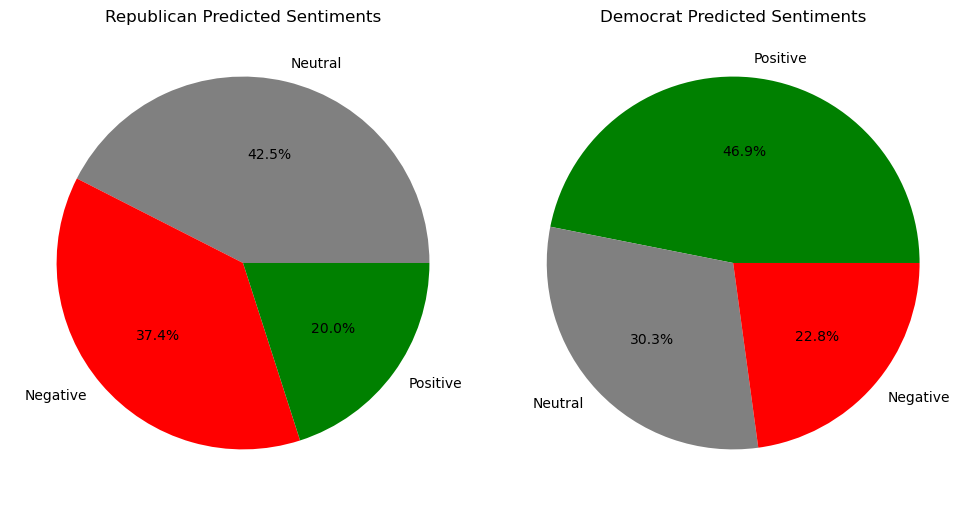

In [64]:
# create big plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# GOP subplot

GOP_proportions = GOP_pred_df[0].value_counts(normalize=True)

c = []
labels = GOP_proportions.index
for i in labels: c.append(color_dict[i])

axs[0].pie(GOP_proportions, labels=labels, colors = c, autopct='%1.1f%%')
axs[0].set_title('Republican Predicted Sentiments')

# dem subplot

dem_proportions = dem_pred_df[0].value_counts(normalize=True)

c = []
labels = dem_proportions.index
for i in labels: c.append(color_dict[i])
    
axs[1].pie(dem_proportions, labels=labels, colors = c, autopct='%1.1f%%')
axs[1].set_title('Democrat Predicted Sentiments')

# show big plot
plt.tight_layout()
plt.show()

In [65]:
GOP_preds = []
dem_preds = []

for article in WashExamArticles:
    new_article = article.split()
    try: party = new_article[len(new_article)-1]
    except: continue
        
    print()
    if (party == 'd'): print('Democrat Article')
    elif (party == 'r'): print('Republican Article')
    else: p = 'Error reading party'
        
    print()
    
    # preprocess article for sentiment analysis
    for i in range(len(new_article)-1):
        try:
            word = new_article[i]
            word = trimWord(word).lower()
            if (word in skip_words): 
                new_article.pop(i)
        except:
            continue
            
    new_article = ' '.join(new_article)
    
    # don't print party character at the end
    print(new_article[:len(new_article)-2])
        
    sent = sentiment(new_article, classifier, word_dict)
    predicted = sentiment_to_num(sent[0])
    
    if (party == 'd'): dem_preds.append(predicted)
    elif (party == 'r'): GOP_preds.append(predicted)

    print()
    print(f'Predicted Sentiment: {sent[0]}.')
    print(str_line)
        
GOP_pred_df = pd.DataFrame(np.array(GOP_preds))
dem_pred_df = pd.DataFrame(np.array(dem_preds))

dem_pred_df[0] = dem_pred_df[0].astype(str).replace('-1', 'Negative').replace('0', 'Neutral').replace('1', 'Positive')
GOP_pred_df[0] = GOP_pred_df[0].astype(str).replace('-1', 'Negative').replace('0', 'Neutral').replace('1', 'Positive')


Republican Article

Reporter Maggie Haberman shared her thoughts on the possibility of former President Donald Trump running for reelection in 2024. Haberman has covered Trump for at least 11 years, accumulating in a new book she's releasing soon on the former president called Confidence Man: The Making of Donald Trump and the Breaking of America. CBS News anchor John Dickerson asked Haberman in an interview that aired Sunday for her view on whether Trump will run again. Haberman warned that she did not know the answer for certain and that she believes the former president has put himself in a position where he has no choice but to run. “I think he’s backed himself into a corner where he has to run,” Haberman said. “I think that he needs the protections that running for president [he thinks] would afford him in combating investigations that he calls a ‘witch hunt.'”

Predicted Sentiment: neutral.
_________________________________________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

Washington Examiner Senior Columnist Tim Carney joins Sarah Westwood to discuss how the Department of Justice is targeting anti-abortion clinics and activists, including Mark Houck.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

Democratic candidate for Senate John Fetterman is firing up attacks against Republicans in Pennsylvania, accusing his GOP challenger Dr. Mehmet Oz of being part of a “power couple” with Republican gubernatorial candidate Doug Mastriano and threatening abortion rights. Fetterman denounced the two Republicans as being “too extreme and radical” for the state, claiming the pair wants to overturn abortion rights in the state. Abortion is legal in Pennsylvania up until 24 weeks, wi


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden started chasing the Oval Office 35 years ago. He has almost certainly wanted the job even longer, winning his first Senate race at 29 a half-century ago.There aren’t many examples of people campaigning for the White House this long, much less finally getting it. Harold Stassen sought the Republican presidential nomination 10 times between 1940 and 1992, deferring only to Dwight Eisenhower, Richard Nixon, and Gerald Ford and coming closest in 1948. Bob Dole won the nomination on his third try, 20 years after he was the vice presidential nominee. He did not become president.Mourning his son Beau and discouraged by his boss, then-President Barack Obama, Biden wanted to run in 2016 but didn’t. That seemed to close the book on his presidential ambitions, leaving him to settle for the Presidential Medal of


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

A pair of football players tackled someone who was not on the opposing team Monday night when a protester darted onto the field. The Los Angeles Rams were playing against the San Francisco 49ers when the protester ran onto the field carrying something emitting what appeared to be pink smoke. As the protester was running, Rams players Bobby Wagner and Takkarist McKinley chased after him and pushed him to the ground, according to ESPN. "That's what we're talking about, Wagner!" said commentator Peyton Manning. "A veteran, right, get 'em down, now get out and let these guys take over!"

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Christian Walker put his father, Georgia Senate hopeful Herschel Walk


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Voters swung hard toward the Republicans in late September, suggesting the Democrats’ summer surge is waning as the midterm elections approach, according to a new poll from Monmouth University.In the survey, the Democrats saw their standing in the generic ballot shrink from a 50% to 43% lead over the Republicans in August to a 47% to 44% deficit last month, with more respondents preferring Republican control of Congress. The poll ran from Sept. 21-25. The survey also found economic concerns trumping abortion, with 82% saying inflation was their top priority and 68% saying jobs and unemployment were most important, compared to 56% who said the same about abortion.Concern about the loss of federal protections for abortion rights in the wake of the Supreme Court’s Dobbs v. Jackson Women’s Health Organization ruling was a 


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

New York Democratic congressional candidate Max Rose said he doesn't support Joe Biden running for a second term as president.Rose is set to face off against incumbent Republican Nicole Malliotakis again for New York's 11th Congressional district after being unseated by her in 2020. He made the announcement after it was reported Biden told the Rev. Al Sharpton that he planned to run for reelection in 2024, though he hasn't made an announcement yet. "I do not think that Donald Trump should run in 2024. I do not think that Joe Biden should run in 2024," Rose told FOX 5 NY. "I'm sick and tired of that generation being in power. We've got to move on."

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Forme


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

A bombshell report that accuses Georgia GOP Senate hopeful Herschel Walker of paying for a former girlfriend's abortion has put his views on the issue under the political spotlight.Walker has vehemently opposed abortion rights and has called for a complete ban. It's a position he's touted on his campaign website and at numerous rallies. The possibility that the former NFL running back may have paid for the 2009 abortion and then sent his ex a get-well card has prompted some on the Left to call him a hypocrite. "I bet Herschel Walker isn't the only Anti-Choice candidate who has paid for, facilitated or encouraged a woman to have an abortion. All of those hypocrites should be outed," Democratic activist and political commentator Christopher Hahn tweeted.

Predicted Sentiment: neutral.
____________________________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

(The Center Square) – Jury selection started Monday for three men accused of providing material aid to people convicted of plotting to kidnap Gov. Gretchen Whitmer in 2020. Joe Morrison, father-in-law Pete Musico and Paul Bellar are facing trial in Jackson County. The men are charged with gang membership and providing material support for terrorist acts, which each carry a maximum prison sentence of 20 years. They also face felony gun charges. Court records say Morrison started the Wolverine Watchmen group via a Facebook page on Nov. 25, 2020. The state says this augmented to an alliance including alleged ringleaders Adam Fox and Barry Croft, who in August were convicted on federal charges of kidnapping conspiracy and conspiring to obtain and use weapons of mass destruction.

Predicted Sentiment: positive.
_____________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Georgia Gov. Brian Kemp has raised nearly $29 million over the last three months, collecting more money between July 1 and Sept. 30 than he did during his entire 2018 gubernatorial campaign.The sitting governor, who is facing Democratic challenger Stacey Abrams in the November midterm election, raised $8.9 million in campaign contributions and received another $19.8 million through a leadership committee that allows him to accept unlimited donations. "We literally have fundraisers close to six-and-a-half days a week on average, all the way through the election," the Atlanta Journal-Constitution reported Kemp as saying. "And we just have to have that funding to be able to operate everything we need to do to make sure that we win."

Predicted Sentiment: positive.
_________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden's foreign policy missteps in Afghanistan caused the public to question his competence and coincided with his initial tumble in job approval numbers.Now Russia's war in Ukraine and OPEC+'s decision to cut oil production are poised to have repercussions for next month's midterm elections, with gas prices rising again in many parts of the country and overall inflation hardly getting better.The rising cost of living is linked, in part, to the COVID-19 pandemic. But supply chains were also snarled by Russia's invasion of Ukraine before Saudi Arabia-led OPEC+ announced it would be slashing oil production by 2 million barrels a day from November, connecting foreign policy to this midterm cycle, according to Brookings Institution foreign policy research director Michael O'Hanlon.

Predicted Sentiment: positi


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden made a stop in the safe blue territory of New York to tout jobs created by the $280 billion CHIPS and Science Act, which was signed into law in August. Biden toured and then spoke from an IBM facility in Poughkeepsie, New York, about 80 miles north of New York City, saying the bill would help the United States stay competitive in computer chip manufacturing. "This factory and the factories of other companies across America are where America's future is literally being built," Biden said. "Just since we've been elected, we've created 678,000 new manufacturing jobs."

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

It might be hard to believe given the Biden presidency, but at one time,


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden has not completely discounted the prospect of a meeting between himself and Russian President Vladimir Putin on the sidelines of the G-20 summit next month in Indonesia.“That remains to be seen," Biden told reporters Thursday on the White House's South Lawn.White House press secretary Karine Jean-Pierre earlier declined to confirm a separate meeting between Biden and Chinese President Xi Jinping, who is also expected to attend the summit in Bali from Nov. 15-16.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

A once-sleepy U.S. Senate race in North Carolina heated up Friday night, with Republican Rep. Ted Budd facing off against Democratic challenger Cheri Beasley for outgoing GO


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Rep. Marjorie Taylor Greene, the combative Georgia Republican, has become a regular on the Trump train, part of the former president’s parade of speakers at his growing number of political rallies.She's been invited to join President Donald Trump in Arizona this weekend. And last weekend, she spoke before him in Michigan.Greene’s popularity is so high among Trump supporters that she was asked to sign copies of the former president’s photo book and sold 250.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden acknowledged gas price averages are ticking up, attributing the blame to OPEC+'s decision to cut oil production by 2 million barrels a day.Biden warned if Republicans gain control 


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Former President Donald Trump is speaking at a "Save America" rally in Minden, Nevada, on Saturday to stump for his preferred candidates in a must-win swing state. The event is taking place at the Legacy Sports Park, a sports complex next to the Minden-Tahoe Airport in Minden, making it easy for the former president to land his plane and head straight to the rally. Minden is a very small town, with a population of just under 3,500 people, making up about 0.1% of the state’s population. The 45th president is hoping to excite and engage rural voters as Republicans work to oust Sen. Catherine Cortez Masto (D-NV) from her seat in November. Cortez Masto is facing a significant challenge in Adam Laxalt, the former state attorney general whom Trump will be campaigning for at Saturday's rally. Trump will also stump for Clark 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

If ordinary taxpayers fail to file returns, congressional Democrats hire 87,000 new IRS agents to punish them. Yet if the IRS destroys 30 million “tax information” returns without even processing, those Democrats actively block attempts to demand an explanation. Apparently, Democrats think transparency is unnecessary for tax collectors for the welfare state. For those who missed the original story, some background is in order, especially to understand how astonishingly brazen the Democrats are in refusing to hold the IRS accountable. On May 22, the treasury inspector general for tax administration reported that the IRS deliberately destroyed 30 million returns in 2021 so as to relieve a backlog of paper documents in anticipation of a flood of new filings. The agency cited software limitations as an excuse.

Predicted Sen


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

CNN anchor Jake Tapper will conduct a rare interview with President Joe Biden that will air Tuesday evening, the network announced on Monday. It will be the second night for Tapper's new 9 p.m. prime-time show, which is launching in the run-up to the midterm elections. Tapper also anchors The Lead with Jake Tapper and State of the Union, which air on weekday afternoons and Sunday mornings, respectively. "Just Announced: @JakeTapper will sit down with President Joe Biden for an exclusive primetime interview on Tuesday, October 11, at 9pm ET only on @CNN," the network tweeted.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

An advocacy group for small businesses filed a new lawsuit seeking to block Presi


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Former President George H.W. Bush reportedly used a newspaper to hide from Donald Trump at an airport in the early 90s. Bush was just out of office when he stumbled upon Trump at an airport in the 1990s, New York Times correspondent Maggie Haberman recounted in an anecdote that didn't make it in her new book. "H. W. Bush — newly out of office maybe a year or two, is at JFK Airport. He’s getting ready to go to a speech overseas. And he’s reading a newspaper, possibly a newspaper I work for. And someone comes over to him and says, 'Excuse me, Mr. President, Donald Trump is here, and he’s wondering if you’d like to meet him,'" Haberman recalled.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Liberals


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Of the many sizzling cases on the Supreme Court docket this fall, one case has the potential to alter American breakfasts for years to come: National Pork Producers Council v. Ross. The court will decide whether California voters should be allowed to dictate how farmers in Iowa and Minnesota produce pork. If the court sides with California, it could make it even more difficult for consumers to bring home the bacon. The case hinges on the legality of Proposition 12, a ballot measure passed by California voters in 2018. Prop 12’s main advocates were vegan advocacy groups led by the Humane Society of the United States. They sold the policy as a modest reform to farming practices to make the raising of pigs more humane. In practice, it will ban the sale in California of more than 95% of the pork produced in the United Sta


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden said he believes Russian President Vladimir Putin is a “rational actor” who has miscalculated his war aims in Ukraine seven months into a conflict the president said last week risked tipping into nuclear “Armageddon.”“I think he is a rational actor who has miscalculated significantly,” Biden told CNN anchor Jake Tapper in a Tuesday interview amid escalating attacks in the war in Ukraine and Biden’s recent warnings. The full interview is set to air Tuesday evening on CNN.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

NBC News agreed to allow the use of a computer monitor for Pennsylvania Senate hopeful Lt. Gov. John Fetterman to read the questions he was asked because of difficultie


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

The Supreme Court sided with a Republican candidate who lost his bid for judgeship in Pennsylvania, ordering the 3rd U.S. Circuit Court of Appeals to toss out its ruling that allowed the counting of mail-in ballots in the race.Justices on the high court vacated the 3rd Circuit ruling at the request of David Ritter, who ran in 2021 to be a judge on the Lehigh County Court of Common Pleas. He lost to his Democratic rival Zachary Cohen by five votes after 257 absentee ballots without dates on the envelope were counted.The decision to remand the case does not affect the outcome of the 2021 race.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Another poll has pegged Republican congressional hopeful Al


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Republican Sen. Mitt Romney of Utah is ill-serving his party, his state, and his nation by staying neutral in the race for Utah’s other Senate seat. The incumbent is the thoughtful and solidly conservative Republican Mike Lee, a Reaganite constitutional scholar who clerked for superstar Supreme Court Justice Samuel Alito. The challenger is shape-shifting “independent” Evan McMullin, who has the official endorsement of the Utah Democratic Party. Romney claims to be a “good friend” of both candidates, so he is endorsing neither. This is specious. On both philosophical grounds and because of the considerations he owes his party and his country, Romney should see a duty to help his fellow incumbent Republican.

Predicted Sentiment: neutral.
__________________________________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden has singled out China in his highly anticipated national security strategy, which outlines his administration's plan to counter geopolitical competitors.The document, published Wednesday, describes China as "the only competitor with both the intent and, increasingly, the capability to reshape the international order," though it also underscores the importance of "constraining a dangerous Russia."During a press briefing before remarks at Georgetown University, national security adviser Jake Sullivan referred to China as the country's "most consequential geopolitical challenge." But he added that the strategy attempts to avoid approaching foreign policy "through the prism of strategic competition," amplifying the need for cooperation on issues such as "climate change, to food insecurity, to communicabl


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden teased new actions to tackle rising gas prices, which drivers across the country have been facing in recent weeks after enjoying a considerable decline in prices through the end of summer. Something could come next week, Biden said Thursday in Los Angeles, where gas prices are among the highest in the nation. "The price of gas is still too high, and we need to keep working to bring it down," Biden said. "I'll have more to say about that next week."

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

The Biden administration has extended the COVID-19 public health emergency through Jan. 11. The public health emergency, which was set to expire Thursday, will now remain in place past the 


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

The Jan. 6 select committee unanimously voted in favor of subpoenaing former President Donald Trump during its Thursday hearing as part of its investigation into the riot at the Capitol. Members of the panel have long weighed whether to call the former president directly to appear before the committee, with lawmakers noting that it is unlikely he would comply. While the committee has called for senior members of the Trump administration and campaign team, as well as members of his family, to testify, subpoenaing a former president would be a marked escalation for the congressional panel. Chairman Bennie Thompson (D-MS) argued that hearing directly from the former president would provide critical insight, saying members feel he holds responsibility for the deadly riot.

Predicted Sentiment: neutral.
___________________


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Fifteen different governors beat Gov. Ron DeSantis and Greg Abbott on the CATO Institute's fiscal-conservative scorecard, with one governor from a state viewed as competitive for both parties coming out on top. The two conservative stars got a low grade of C, behind 10 governors given a B and five governors given an A. The Florida and Texas governors' scores were equal to those of some Democratic governors, as well as Gov. Kristi Noem (R-SD). Gov. Kim Reynolds (R-IA) received the highest marks. "This report grades governors on their fiscal policies from a limited‐​government perspective. Governors receiving an A are those who have cut taxes and spending the most, whereas governors receiving an F have increased taxes and spending the most. The grading mechanism is based on seven variables: two spending variables, one r


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

The Biden administration's fall campaign to get people vaccinated with the omicron booster has been off to a slow start, with only 14.8 million people opting to get the new shot since it was first made available in late August to those 12 and older and earlier this week to those 5-11 years old. The government hoped to have more people boosted in anticipation of a rise of COVID-19 cases going into the holiday season, purchasing over 170 million doses of Moderna's and Pfizer-BioNTech's updated boosters in advance, but public interest has appeared to wane as only a small percentage of the roughly 226 million people who have completed their primary vaccination series have received the new booster, according to Centers for Disease Control and Prevention data released Thursday. "We’re doing everything we can as an administrat


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

‘IT WOULD HAVE BEEN A DEBACLE’: Fearing he’d be forced from office and that incoming President Joe Biden would not follow through on his plans to leave Afghanistan, President Donald Trump signed a hastily drafted order to withdraw all U.S. troops before Biden was inaugurated.The order, signed Nov. 11, 2020, required the immediate withdrawal of U.S. troops from Somalia and Afghanistan and was offered by the Jan. 6 committee as evidence that Trump knew he lost the election, but it also showed that Trump was ready to rush a withdrawal with no plans to rescue Afghan partners or to hold on to the Bagram Air Base, as he later claimed he would have done.“He disregarded concerns about the consequences for fragile governments on the front lines of the fight against ISIS and al Qaeda terrorists,” said Rep. Adam Kinzinger (R-IL)


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Conservatives are accustomed to their viewpoints being described as disinformation, hate, even literal violence.It’s not a new phenomenon. Economic conservatism has been compared to anti-government extremism since at least the days of Barry Goldwater. Social conservatism is likened to ayatollahs, the Taliban, or The Handmaid’s Tale, whatever is in fashion at the time. All more or less successful forms of conservatism dating back to the 1960s have been described as a form of racist backlash, with Theodor Adorno’s work going further back than that.But it is a situation that has gotten worse with the advent of social media and the woke Left. President Joe Biden sounds like Adorno himself, or at least a graduate student who has glanced at the CliffNotes, musing that a substantial wing of the Republican Party is at least “s


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Republican Senate candidates are trailing far behind their Democratic opponents in fundraising totals and cash on hand. The latest Federal Election Commission campaign finance reports published Saturday showed stark differences in battleground elections. These figures only account for money raised directly by each individual campaign and do not account for spending from outside groups. Sen. Raphael Warnock (D-GA) raised $26.3 million in the third quarter between July and September and has $13.7 million in cash on hand. His opponent, Republican Herschel Walker, raised $12 million — less than half Warnock's haul — in the same amount of time and has $7 million in cash on hand a month before the election.

Predicted Sentiment: positive.
_______________________________________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

The Trump administration regularly interfered with the Centers for Disease Control and Prevention’s public health messaging early in the coronavirus pandemic to bend to the administration's political interests, a House investigation alleges. The Democratic-led House select subcommittee on the coronavirus crisis said interviews with top officials who worked at the CDC and Department of Health and Human Services during the time, including former Director Dr. Robert Redfield, emails, and other evidence revealed how Trump-appointed aides "usurped control of CDC communications" and overruled top scientists to water down messaging regarding faith communities, polling locations and voters, and testing. "The Select Subcommittee’s investigation has shown that the previous administration engaged in an unprecedented campaign of 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

House Majority Leader Steny Hoyer (D-MD) says the subpoena issued by the Jan. 6 committee for former President Donald Trump to testify will be treated just as any other subpoena. During an interview with Al Sharpton on MSNBC's PoliticsNation on Sunday, Hoyer said that the House would pursue legal action against Trump should he defy the subpoena. "Well, it's very difficult because time is short, but we're going to treat him just as we would any other citizen that refuses to testify: Go to court and ask that that individual be held in contempt and ordered to testify," Hoyer said. "A former president is not above the law any more than the president is above the law."

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democra


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

The governor of Arizona will not concede immediately to the Biden administration over an order to remove shipping containers stacked along the U.S-Mexico border and signaled a looming fight against Washington.A spokesman for Gov. Doug Ducey (R-AZ) told the Washington Examiner Tuesday afternoon that the state is carefully considering its response to the Interior Department Bureau of Reclamation’s recent letter. The Biden administration demanded the 120 shipping containers stacked in Yuma, Arizona, be cleared out on the basis that they violated U.S. law and were not approved to be placed on federal land.“As for the letter, we question their legal analysis and we are looking at our options,” Ducey’s Communications Director C.J. Karamargin said in a phone call.

Predicted Sentiment: neutral.
________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden had another awkward moment with a teleprompter during a speech on Monday. When telling viewers how to report fraud regarding student loan forgiveness, the president proceeded to spell out "D-O-T" while saying what website people should consult. "If you get any questionable calls, please tell us by going to report fraud … report fraud, D-O-T, F-T-C, dot gov," Biden said.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Washington Examiner Editor-in-Chief Hugo Gurdon said President Joe Biden and the Democrats are living in denial as the midterm elections approach. Gurdon appeared on Fox Business Tuesday, saying the party is unwilling to take responsibility for record inflation and has 


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Republican Rep. Lee Zeldin said he entered the race for New York governor to win. “I am not in this race to come in second,” Zeldin told Fox News’s Laura Ingraham on Tuesday. I am not in this race to come in 2nd: Lee Zeldin pic.twitter.com/mjkVgZTC09

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The Congressional Black Caucus PAC donated to white incumbent Rep. Frank Mrvan (D-IN) over his black Republican opponent, Jennifer Ruth Green. Mrvan received $5,000 from the CBC's PAC on Sept. 28, bringing his reported total at the end of the month to $1,871,504, according to Open Secrets. Some $536,000 of that money has been raised by other similar political action committees. In 2018, Mrvan raised $40,1


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden announced the awarding of $2.8 billion in new Department of Energy grants for projects meant to boost America's transition to electric vehicles.Biden previously announced his goal of transitioning the U.S. fleet to 50% electric by 2030 and has previously moved to force the federal government to transition the federal fleet ahead of that schedule. This tranche of funds, allocated by the Bipartisan Infrastructure Law, will be awarded to 20 battery manufacturing and processing plants in 12 different states: Alabama, Georgia, Kentucky, Louisiana, Missouri, Nevada, New York, North Carolina, North Dakota, Ohio, Tennessee, and Washington. Michigan, where the president has repeatedly traveled to and touted as the center of the EV revolution, was not awarded new grants Wednesday.

Predicted Sentiment: positiv


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden’s plans to combat the energy crisis fueled by the war in Ukraine are producing the opposite effect, and “it makes no sense,” a former GOP lawmaker told the Washington Examiner. Former Rep. Greg Walden (R-OR) said the Biden administration should be taking advantage of opportunities to enhance “smart” competition here in the United States when it comes to the energy sector to avoid the house of cards Europe is facing when it comes to oil and gas. “Now, with enormously high energy costs, I’m concerned,” Walden said on the Plugged In podcast, adding, “I mean, they give us these head fakes about [how] we’re going to develop more energy here, but then they shut down some of the permitting process ... It makes no sense."

Predicted Sentiment: positive.
________________________________________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

In the months since the U.S. Supreme Court issued what many consider its most significant decision in five decades, Dobbs v. Jackson Women’s Health Organization (overturning the court’s earlier creation of a fictitious “constitutional” right to abortion in Roe v. Wade), the nation has inched closer to the Nov. 8 midterm elections. And with control of both chambers of Congress up for grabs, how big of an issue will abortion be for voters? To hear the party in power tell it, Americans are at an inflection point, where women’s … er, pregnant people’s lives are on the line if they don’t have unfettered access to abortion.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Democrats appear to be losing ground 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Anne Sacoolas, wife of U.S. diplomat Jonathan Sacoolas, pleaded guilty to causing the death of a teenage British motorcyclist in a high-profile case that caused a diplomatic rift between the United States and the United Kingdom. Sacoolas, 45, pleaded guilty to death by careless driving in order to avoid harsher sentencing under a death by dangerous driving charge, according to the BBC. Death by careless driving carries a maximum sentence of five years imprisonment, while death by dangerous driving, prior to June 28, carries a maximum of 14 years in prison, according to the U.K. sentencing council. Sacoolas appeared in court via video link from the U.S. to hear her conviction. In August 2019, Harry Dunn was killed after being hit outside a U.S. military base by Sacoolas's car, which was driving on the wrong side of the 


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

As Election Day draws closer, a new poll shows Rick Caruso, a billionaire developer and former Republican running for mayor of Los Angeles, locked in a statistical tie with Rep. Karen Bass (D-CA). Caruso leads Bass by 3 percentage points among likely voters in the Southern California News Group poll, eroding the congresswoman’s double-digit advantage. If the election were held today, 39.8% of likely voters said they would cast a ballot for Caruso, compared to 36.8% for Bass, according to the survey, a statistical match that falls within the margin of error. Another 23.6% were undecided or declined to answer.The results come days after Bass earned a campaign boost from President Joe Biden and as Democrats begin to lose traction with voters in key races nationally.

Predicted Sentiment: negative.
_________________________


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Rep. Jim Jordan (R-OH) said Republicans cannot become “overconfident” and take their foot off the gas pedal in the race toward November’s midterm elections. “We should campaign confidently but never be overconfident. We need to push this thing through,” Jordan told Fox News's Sean Hannity Thursday. Jordan pointed to the state of both President Joe Biden’s health and Democrat John Fetterman’s health in the race for one of Pennsylvania’s Senate seats as two examples of what is at stake if Republicans cannot retake control of Congress, noting that “the Left doesn’t care.”

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

A Florida man accused of voter fraud by an office under Gov. Ron DeSantis had his 


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Gordon Sondland, the former European Union ambassador, is saying out loud what many fans of the former president are whispering: Donald Trump should step aside and help elect another Republican who supports the MAGA agenda as the 47th president of the United States.“Be the kingmaker, pick a successor, get behind the successor, and hopefully pick someone that actually is electable,” said Sondland.While he expects his former boss to get into the 2024 GOP primary, and likely win, he said even if Trump beats President Joe Biden, it will be a controversial and potentially lost four years as Democrats again gang up to take Trump down.

Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

In yet another example o


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

Former President Donald Trump's business empire, the Trump Organization, is poised to head to trial Monday for a flurry of alleged tax and financial crimes. Although Trump has not been charged in the sprawling case, Manhattan District Attorney Alvin Bragg has kept the door open to levying charges against him in the future. If found guilty, the Trump Organization will be forced to pay fines and back taxes totaling roughly $1.6 million, Bloomberg reported. The Trump Organization, which was indicted last year, has pleaded not guilty to the charges. No one will go to prison if there is a criminal conviction in the matter.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

When Florida flew illegal immigr


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden’s catch-and-release policies have induced so many immigrants to cross our southern border illegally that the Border Patrol cannot process them fast enough and U.S. Immigration and Customs Enforcement cannot keep track of where they go. That is the conclusion of a Government Accountability Office report released this week. On day one of his administration, Biden ended former President Donald Trump’s "Remain in Mexico" policy. He also instituted a 100-day moratorium on deportations and stopped returning unaccompanied minors to Mexico through Title 42. Biden soon extended the Title 42 loophole to families as well. The impact of Biden’s catch-and-release policies was swift and clear. Monthly apprehensions of immigrants illegally crossing the southern border rose from 73,994 in December 2020 to 173,277 in


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Democrat Article

Sen. Bernie Sanders (I-VT) said he is worried about both young and working-class voter turnout among Democrats with the midterm elections fast approaching. High inflation and elevated gas prices have severely affected the working class, potentially putting some of them off from voting for Democrats in the upcoming November midterms, Sanders warned during an interview with Jake Tapper on CNN's State of the Union on Sunday. He said that "corporate greed" is ripping off U.S. citizens, particularly those who have a difficult time filling up gas tanks and paying for food or prescription drugs.

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Republican Article

A Republican running for a seat in the Arizona Legislature is fac


Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Democrat Article

President Joe Biden mistakenly referred to Vice President Kamala Harris as a "great president" on Monday. During an event celebrating Diwali, Biden delivered remarks on the holiday. At one point, he recognized Harris's recent birthday. WATCH: @POTUS Biden says @VP Kamala Harris is a "great president"READ: https://t.co/bzoPBKHIXl pic.twitter.com/rYhK4qC2yK

Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

A group of 30 House liberals is calling on President Joe Biden to negotiate a settlement to end Russia’s war in Ukraine, the first time senior Democrats have urged him to pursue an alternative effort to end the conflict. The letter, sent to the White House on Monday from Rep. Pramila Jayapal (D-WA), cha


Predicted Sentiment: positive.
_____________________________________________________________________________________________________________________

Democrat Article

Republicans have been using crime as a key area to slam Democrats as the midterm elections loom closer. Now, Democrats are joining in on criticizing fellow party members for their methods of handling crime. In Loudoun County, Virginia, Supervisor Kristen Umstattd (D) said to ABC7News WJLA-TV that she is concerned about how County Attorney Buta Biberaj's methods to reduce crime could negatively affect both the county budget and community safety. "Her philosophy — she has boasted about it — her philosophy is that she should get as many people out of the jail as possible," said Umstattd.

Predicted Sentiment: negative.
_____________________________________________________________________________________________________________________

Republican Article

Climate change protesters interrupted Sen. Ted Cruz (R-TX) on Monday


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

A Florida judge ruled against Gov Ron DeSantis (R-FL) in a legal fight over documents underlying migrant flights to Martha's Vineyard, Massachusetts. The move Tuesday came in a legal challenge from the Florida Center for Government Accountability, which argued that the governor's office was not following the state's public records law, failing to disclose the documentation surrounding the flights properly, according to Politico. Circuit Judge J. Lee Marsh ruled in the group's favor, demanding that DeSantis hand over the proper flight records within 20 days. “The governor has been held accountable to his constitutional duty to provide public access to records,” said Michael Barfield, director of public access for Florida Center for Government Accountability, expressing his satisfaction with the ruling. “The rule of law 


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

The Washington Examiner's Sarah Westwood discussed the "consistent undercount of Republican support" in polling data on Fox Business on Tuesday, explaining how that could similarly play out in the midterm elections. "I think we have seen a consistent undercount of Republican support in polls in 2016, in 2020," Westwood told host Neil Cavuto. "In 2021, for example, in the New Jersey governor’s race, the RealClearPolitics average of polls the night before Election Day had the governor, Phil Murphy, up 8 points. He ended up winning by less than 3. So that was a significant undercount." She further described Democratic candidates losing traction in polls in deeply blue states, while other polls show Republicans with high support in some states in tight races. According to Westwood, "it's hard to believe those polls when, n


Predicted Sentiment: neutral.
_____________________________________________________________________________________________________________________

Republican Article

Alaska Republicans voted to censure Minority Leader Mitch McConnell (R-KY) on Monday, denouncing him for backing incumbent Sen. Lisa Murkowski in her reelection bid against Kelly Tshibaka, who was endorsed by the state party. The Alaska Republican Party passed a resolution on Monday denouncing the minority leader for “divisive and misleading statements” after McConnell allocated millions of dollars from the Senate Leadership Fund toward attack ads against Tshibaka. The resolution passed the party with a 49-8 vote. “Much of the financial support from the Senate Leadership Fund has been used for malicious political attack ads targeted at our endorsed candidate, Kelly Tshibaka, that are gross distortions of fact,” the party wrote in the resolution. “We request the Senate Leadership Fund immediately stop the attack ads aga

In [66]:
print(f"Total articles: {len(GOP_pred_df) + len(dem_pred_df)}")
print(f"Total Republican articles: {len(GOP_pred_df)}")
print(f"Total Democrat articles: {len(dem_pred_df)}")

Total articles: 563
Total Republican articles: 297
Total Democrat articles: 266


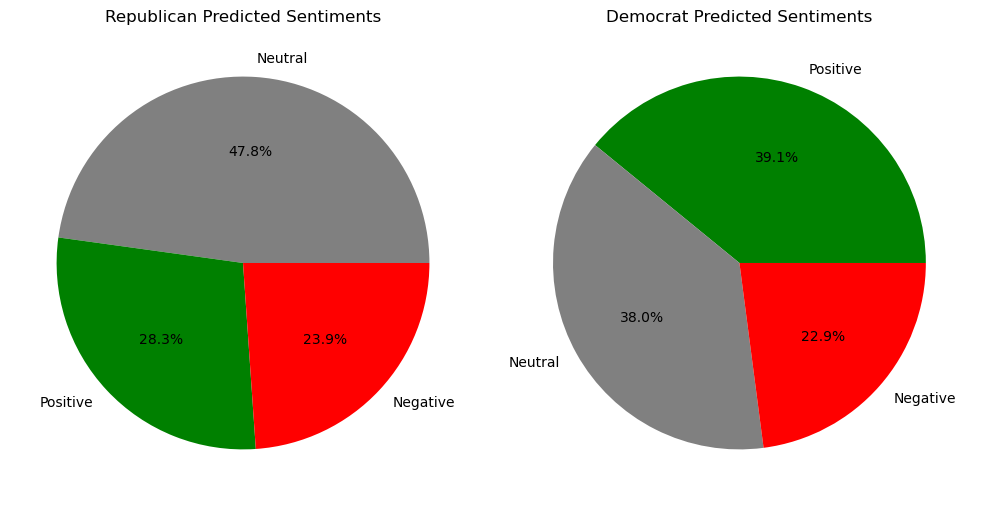

In [67]:
# create big plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# GOP subplot

GOP_proportions = GOP_pred_df[0].value_counts(normalize=True)

c = []
labels = GOP_proportions.index
for i in labels: c.append(color_dict[i])

axs[0].pie(GOP_proportions, labels=labels, colors = c, autopct='%1.1f%%')
axs[0].set_title('Republican Predicted Sentiments')

# dem subplot

dem_proportions = dem_pred_df[0].value_counts(normalize=True)

c = []
labels = dem_proportions.index
for i in labels: c.append(color_dict[i])
    
axs[1].pie(dem_proportions, labels=labels, colors = c, autopct='%1.1f%%')
axs[1].set_title('Democrat Predicted Sentiments')

# show big plot
plt.tight_layout()
plt.show()

In [40]:
if (save_model): 
    save_file = f'{saved_model_path}rf_political_classifier.joblib'
    joblib.dump(classifier, save_file)
    print(f'Successfully saved model to \n{save_file}')